# 1번

## MOONS 데이터 셋에서 결정 트리를 훈련시키고 세밀하게 튜닝해보세요.


In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons

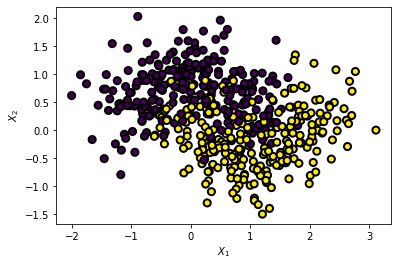

In [2]:
#a

X, y = make_moons(n_samples=500, noise=0.4, random_state=42)
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y, s=50,
            edgecolor="k", linewidth=2)
plt.xlabel("$X_1$")
plt.ylabel("$X_2$")
plt.show()

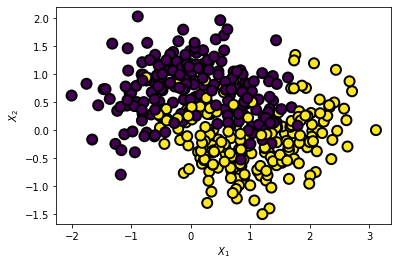

In [3]:
#b

#데이터 훈련과 테스트로 분리하기
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=77)
plt.scatter(X_train[:, 0], X_train[:, 1], marker='o', c=y_train, s=100,
            edgecolor="k", linewidth=2)
plt.xlabel("$X_1$")
plt.ylabel("$X_2$")
plt.show()

In [4]:
#c

#결정트리
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
params = {'max_leaf_nodes': list(range(2, 100))}

#그리드서치로 최적의 파라미터 찾기
grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42), params, verbose=1, cv=5)
grid_search_cv.fit(X_train, y_train)

Fitting 5 folds for each of 98 candidates, totalling 490 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 490 out of 490 | elapsed:    0.5s finished


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                            13, 14, 15, 16, 17, 18, 19, 20, 21,
                                            22, 23, 24, 25, 26, 27, 28, 29, 30,
                                            31, ...]},
             verbose=1)

In [5]:
grid_search_cv.best_estimator_

DecisionTreeClassifier(max_leaf_nodes=10, random_state=42)

In [6]:
#베스트 파라미터 찾기
grid_search_cv.best_params_

{'max_leaf_nodes': 10}

In [7]:
deci_tree_clf = DecisionTreeClassifier(max_leaf_nodes=10, random_state=42)
deci_tree_clf.fit(X_train,y_train)

DecisionTreeClassifier(max_leaf_nodes=10, random_state=42)

In [8]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[-1.5,2.5,-1,1.5], alpha=0.5, contour=True,title=None):
    width = np.linspace(axes[0], axes[1], 100)
    height = np.linspace(axes[2], axes[3], 100)
    
    x1, x2 = np.meshgrid(width, height)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    
    custom_cmap = ListedColormap(['#ffaaaa','#aaaaff'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if contour:
        custom_cmap2 = ListedColormap(['#000000','#ffffff','#000000'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
        
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "ro", alpha=alpha)
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", alpha=alpha)
    
    plt.axis(axes)
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if title : plt.title(title,fontsize=14)

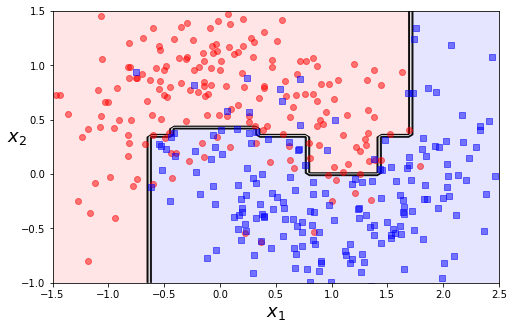

In [9]:
plt.figure(figsize=(8, 5))
plot_decision_boundary(deci_tree_clf, X_train, y_train)

In [10]:
deci_tree_clf1 = DecisionTreeClassifier(max_leaf_nodes=10, random_state=42)
deci_tree_clf1.fit(X_train,y_train)

DecisionTreeClassifier(max_leaf_nodes=10, random_state=42)

In [11]:
#d

from sklearn.metrics import accuracy_score

#prediction으로 score 확인
y_pred = deci_tree_clf.predict(X_test)
y_pred1 = deci_tree_clf1.predict(X_test)
print('max_leaf_nodes=7, :',accuracy_score(y_test, y_pred))
print('max_leaf_nodes=20:',accuracy_score(y_test, y_pred1))

max_leaf_nodes=7, : 0.79
max_leaf_nodes=20: 0.79


# 2번
## MNIST 데이터셋을 불러와서 훈련세트와 테스트세트로 분리하고 다음을 실행해 보세요.

In [12]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', as_frame=False)

In [13]:
X, y = mnist["data"], mnist["target"]

#훈련세트와 테스트세트로 분리하기
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [14]:
from sklearn.ensemble import RandomForestClassifier

#랜덤포레스트 이용
forest_clf = RandomForestClassifier(n_estimators=100, random_state=42)
forest_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [15]:
y_pred_rf = forest_clf.predict(X_test)

#predict로 accuracy 찾기
print('Random_forest accuracy:', accuracy_score(y_test, y_pred_rf))

Random_forest accuracy: 0.9705


In [28]:
from sklearn.ensemble import ExtraTreesClassifier
# 엑스트라 트리 이용
xtra_clf = ExtraTreesClassifier(n_estimators=100, random_state=42)
xtra_clf.fit(X_train, y_train)

ExtraTreesClassifier(random_state=42)

In [17]:
y_pred_xtree = xtra_clf.predict(X_test)
print('ExtraTree accuracy:', accuracy_score(y_test, y_pred_xtree))

ExtraTree accuracy: 0.9722


In [18]:
#SGD Classifier 이용
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)
sgd_clf.fit(X_train, y_train)

SGDClassifier(random_state=42)

In [19]:
y_pred_sgd = sgd_clf.predict(X_test)
print('SGD Classifier accuracy:', accuracy_score(y_test, y_pred_sgd))

SGD Classifier accuracy: 0.874


In [20]:
#b

from sklearn.ensemble import BaggingClassifier
bg_clf=BaggingClassifier(DecisionTreeClassifier(), n_estimators=10)
bg_clf.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier())

In [21]:
y_pred_bg = bg_clf.predict(X_test)
print(' Bagging Classifier accuracy:', accuracy_score(y_test, y_pred_bg))

 Bagging Classifier accuracy: 0.9466


In [22]:
from sklearn.ensemble import VotingClassifier
voting_clf = VotingClassifier(estimators=[('random_froest', forest_clf), ('xtra', xtra_clf), ('sgd', sgd_clf)],
      voting='hard')
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('random_froest',
                              RandomForestClassifier(random_state=42)),
                             ('xtra', ExtraTreesClassifier(random_state=42)),
                             ('sgd', SGDClassifier(random_state=42))])

In [23]:
y_pred_voting= voting_clf.predict(X_test)
print(' Voting Classifier accuracy:', accuracy_score(y_test, y_pred_voting))

 Voting Classifier accuracy: 0.9704


In [24]:
sgd_clf1 = SGDClassifier(max_iter=1000, tol=1e-3, loss='log', random_state=42)
voting_clf = VotingClassifier(estimators=[('random_froest', forest_clf), ('xtra', xtra_clf), ('sgd', sgd_clf1)],
      voting='soft')
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('random_froest',
                              RandomForestClassifier(random_state=42)),
                             ('xtra', ExtraTreesClassifier(random_state=42)),
                             ('sgd',
                              SGDClassifier(loss='log', random_state=42))],
                 voting='soft')

In [25]:
y_pred_voting= voting_clf.predict(X_test)
print(' Voting Classifier(soft) accuracy:', accuracy_score(y_test, y_pred_voting))

 Voting Classifier(soft) accuracy: 0.898


C:\Users\queenSSH\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:327: RuntimeWarning: invalid value encountered in true_divide
  prob /= prob.sum(axis=1).reshape((prob.shape[0], -1))


In [26]:
voting_clf = VotingClassifier(estimators=[('random_froest', forest_clf), ('xtra', xtra_clf)],
      voting='soft')
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('random_froest',
                              RandomForestClassifier(random_state=42)),
                             ('xtra', ExtraTreesClassifier(random_state=42))],
                 voting='soft')

In [27]:
y_pred_voting= voting_clf.predict(X_test)
print(' Voting Classifier(soft) accuracy:', accuracy_score(y_test, y_pred_voting))

 Voting Classifier(soft) accuracy: 0.9729
